# Classwork

In [1]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [2]:
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download --unzip tongpython/cat-and-dog

 96% 209M/218M [00:07<00:00, 26.1MB/s]
100% 218M/218M [00:08<00:00, 28.3MB/s]


In [4]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

#Choosing devide to be gpu if have one, else cpu
DEVICE = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [5]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [6]:
train_data = ImageFolder('/content/training_set/training_set', transform = transformations)
test_data = ImageFolder('/content/test_set/test_set', transform = transformations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


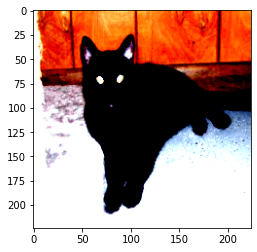

In [7]:
plt.imshow((train_data[10][0]).permute(1,2,0))

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # (224,224)
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
        
        self.pool1 = nn.MaxPool2d(2)
        
        # (112,112)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        
        self.pool2 = nn.MaxPool2d(2)
        
        # (56,56)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
        self.pool3 = nn.MaxPool2d(2)
        # (28,28)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,1)
    
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        
        out = self.flatten(out)
        
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        
        return out

In [9]:
# Training loop for our network
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    #Initializing two lists to save accuracy to plot them later
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    #Going thru every epoch
    for epoch in range(n_epochs):

        #Going thru example, thru every batch, in our case, thru all data at once
        for example, labels in train_loader:     

            #Translating calculations to gpu if is available
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)

            # ensuring equal number of dimensions for labels and examples
            labels  = labels.unsqueeze(1)

            # running our data thru our data - forward
            output = model(example.float())
            # Getting loss of our network right now
            loss = loss_fn(output, labels.float())

            # Zeroing the gradient to not stack it from other iterations
            optimizer.zero_grad()
            #Runing backward part of the neural network, getting gradiets
            loss.backward()
            #Updating our paramters
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total
                
        print(f'Epoch {epoch+1})', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}')

    #If set to True, print graph of train and validation loss
    if print_plot:

        #Setting x-ticks
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [10]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle =True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle =True)

In [ ]:
learning_rate = 1e-3 # 0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

In [ ]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

#loss_fn = nn.BCEWithLogitsLoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

In [ ]:
model

# Homework

In [1]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [2]:
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download --unzip fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:11<00:00, 27.0MB/s]
100% 325M/325M [00:11<00:00, 29.3MB/s]


In [4]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

In [5]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [6]:
train_data = ImageFolder('/content/train', transform = transformations)
test_data = ImageFolder('/content/test', transform = transformations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


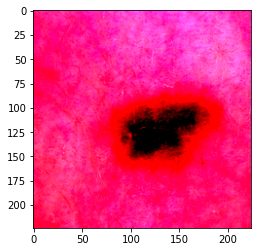

In [7]:
plt.imshow((train_data[1][0]).permute(1,2,0))

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # (224, 224)
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
        
        self.pool1 = nn.MaxPool2d(4)
        
        # (56, 56)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        
        self.pool2 = nn.MaxPool2d(4)
        
        # (14, 14)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(64*14*14,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 8)
        self.fc7 = nn.Linear(8, 1)
    
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        
        out = self.flatten(out)
        
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = F.relu(self.fc5(out))
        out = F.relu(self.fc6(out))
        out = torch.sigmoid(self.fc7(out))
        
        return out

In [9]:

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    train_loss = torch.zeros(n_epochs)
    test_loss = torch.zeros(n_epochs)

    for epoch in range(n_epochs):
        running_loss = 0
        for example, labels in train_loader:     

            example = example
            labels = labels

            labels  = labels.unsqueeze(1)

            output = model(example.float())

            loss = loss_fn(output, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

           # running_loss += loss.item()
            
            
        with torch.no_grad():
            
            for loader, accuracy, loss in [(train_loader, train_accuracy, train_loss),(test_loader, test_accuracy, test_loss)]:
                correct = 0
                total = 0
                loss2 = 0

                for examples, labels in loader:
                    examples = examples
                    labels = labels.view(-1, 1)

                    outputs = model(examples.float())
                    loss1 = loss_fn(outputs, labels.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
                    loss2 += loss1.item()

                accuracy[epoch] = correct / total
                loss[epoch] = loss1 / total

        print(f'Epoch {epoch+1}', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}',
              f'Train Loss: {train_loss[epoch]}',
              f'Test Loss: {test_loss[epoch]}')

    if print_plot:

        epochs = range(n_epochs)

        
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(epochs, train_loss, 'g', label='Training loss')
        plt.plot(epochs, test_loss, 'b', label='Test loss')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [10]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle =True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle =True)

The best model

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1 Train Accuracy: 0.7554038763046265 Test Accuracy: 0.760606050491333 Train Loss: 0.00015643447113689035 Test Loss: 0.0006869887583889067
Epoch 2 Train Accuracy: 0.8160789012908936 Test Accuracy: 0.821212112903595 Train Loss: 0.00013718260743189603 Test Loss: 0.0004034054873045534
Epoch 3 Train Accuracy: 0.8407281041145325 Test Accuracy: 0.8287878632545471 Train Loss: 6.01299834670499e-05 Test Loss: 0.0005132041987963021
Epoch 4 Train Accuracy: 0.852104663848877 Test Accuracy: 0.8378787636756897 Train Loss: 0.00018407516472507268 Test Loss: 0.0004531070007942617
Epoch 5 Train Accuracy: 0.8722032904624939 Test Accuracy: 0.8500000238418579 Train Loss: 0.00012115119898226112 Test Loss: 0.00034858452272601426


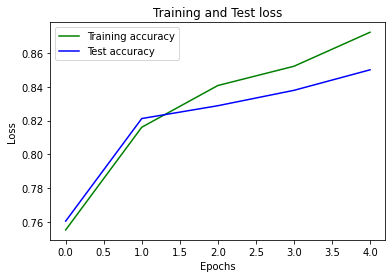

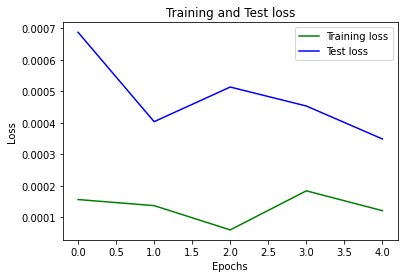

In [11]:
learning_rate = 1e-3
model = Net()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 5,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Other models

Epoch 1 Train Accuracy: 0.7792946696281433 Test Accuracy: 0.7803030014038086 Train Loss: 0.00016619902453385293 Test Loss: 0.0005801721708849072
Epoch 2 Train Accuracy: 0.7918089032173157 Test Accuracy: 0.7757575511932373 Train Loss: 0.00020047604630235583 Test Loss: 0.00037481027538888156
Epoch 3 Train Accuracy: 0.8149412274360657 Test Accuracy: 0.8030303120613098 Train Loss: 0.00013851668336428702 Test Loss: 0.000636808283161372
Epoch 4 Train Accuracy: 0.8255593180656433 Test Accuracy: 0.8242424130439758 Train Loss: 4.1977538785431534e-05 Test Loss: 0.0008513665525242686
Epoch 5 Train Accuracy: 0.8566552996635437 Test Accuracy: 0.8454545736312866 Train Loss: 0.0001530984736746177 Test Loss: 0.0005165035836398602
Epoch 6 Train Accuracy: 0.871065616607666 Test Accuracy: 0.8515151739120483 Train Loss: 0.00012604426592588425 Test Loss: 0.0004921015352010727
Epoch 7 Train Accuracy: 0.8843382596969604 Test Accuracy: 0.8393939137458801 Train Loss: 6.914688856340945e-05 Test Loss: 0.00065983

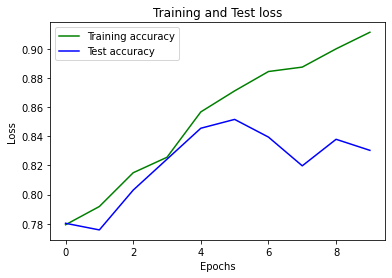

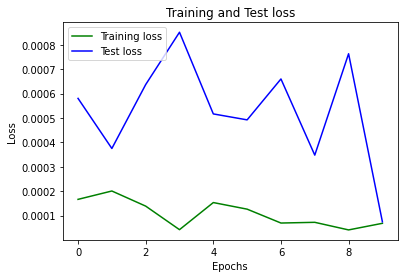

In [12]:
learning_rate = 1e-3
model = Net()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10, #overfitting
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Epoch 1 Train Accuracy: 0.7766401171684265 Test Accuracy: 0.7757575511932373 Train Loss: 0.0002355125470785424 Test Loss: 0.0007653674110770226
Epoch 2 Train Accuracy: 0.8149412274360657 Test Accuracy: 0.8151515126228333 Train Loss: 0.00017360881611239165 Test Loss: 0.00030543943285010755
Epoch 3 Train Accuracy: 0.8418657779693604 Test Accuracy: 0.8409090638160706 Train Loss: 0.00010778148134704679 Test Loss: 0.0005207713111303747
Epoch 4 Train Accuracy: 0.8668941855430603 Test Accuracy: 0.8454545736312866 Train Loss: 9.723484254209325e-05 Test Loss: 0.0003894701658282429
Epoch 5 Train Accuracy: 0.871065616607666 Test Accuracy: 0.8409090638160706 Train Loss: 5.4399770306190476e-05 Test Loss: 0.0005158818676136434
Epoch 6 Train Accuracy: 0.8858551383018494 Test Accuracy: 0.842424213886261 Train Loss: 7.636045484105125e-05 Test Loss: 0.0004149596206843853


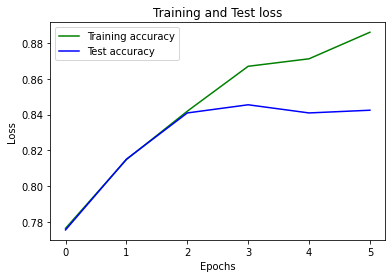

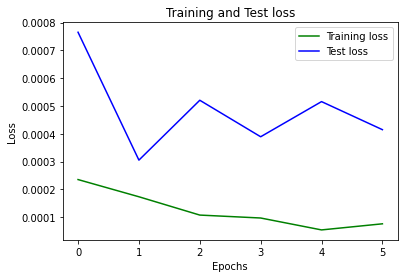

In [13]:
learning_rate = 1e-3
model = Net()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 6,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Pretrained model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch 1 Train Accuracy: 0.8259385824203491 Test Accuracy: 0.7909091114997864 Train Loss: 9.802656131796539e-05 Test Loss: 0.001071116654202342
Epoch 2 Train Accuracy: 0.7895335555076599 Test Accuracy: 0.800000011920929 Train Loss: 0.00015107286162674427 Test Loss: 0.0004578069201670587


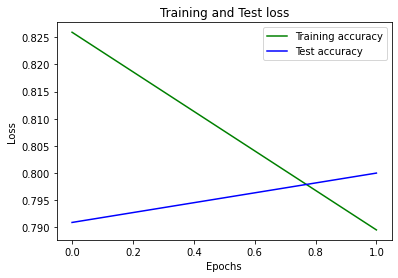

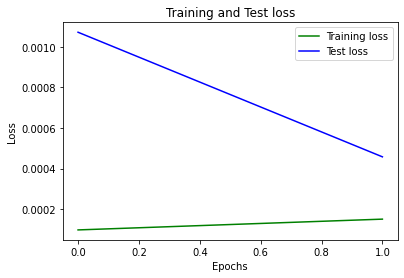

In [14]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

#loss_fn = nn.BCEWithLogitsLoss()

training_loop(
    n_epochs = 2,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

The pretrained model had the first test accuracy higher than the best model's test accuracy, but the next test accuracy of my model was higher than the accuracy of the pretrained model.